# kNN基础

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
raw_data_X=[
    [3.393533211,2.331273381],
    [3.110073483,1.781539638],
    [1.343808831,3.368360954],
    [3.582294042,4.679179110],
    [2.280362439,2.866990263],
    [7.423436942,4.696522875],
    [5.745051997,3.533989803],
    [9.172168622,2.511101045],
    [7.792783481,3.424088941],
    [7.939820817,0.791637231]
]
raw_data_y=[0,0,0,0,0,1,1,1,1,1]

In [6]:
#对数据进行训练，并将list变为numpy的array
X_train=np.array(raw_data_X)
Y_train=np.array(raw_data_y)

In [8]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [9]:
Y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

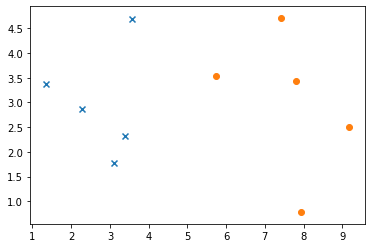

In [12]:
mark_list=['x','o']
for i in range(2):
    plt.scatter(X_train[Y_train==i,0],X_train[Y_train==i,1],marker=mark_list[i])

## 新来样本数据，根据已经训练的值分析他属于哪一类
x = np.array([8.093607318,3.365731514])

In [13]:
x = np.array([8.093607318,3.365731514])

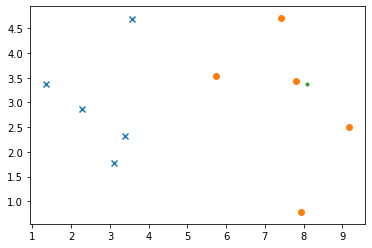

In [18]:
mark_list=['x','o']
for i in range(2):
    plt.scatter(X_train[Y_train==i,0],X_train[Y_train==i,1],marker=mark_list[i])
plt.scatter(x[0],x[1],marker='.')

## kNN的过程
### 思路：计算高维欧氏距离

In [33]:
minus_data=[]
for x_train in X_train:
    minus_data.append(x_train-x)
minus_data

[array([-4.70007411, -1.03445813]),
 array([-4.98353384, -1.58419188]),
 array([-6.74979849e+00,  2.62944000e-03]),
 array([-4.51131328,  1.3134476 ]),
 array([-5.81324488, -0.49874125]),
 array([-0.67017038,  1.33079136]),
 array([-2.34855532,  0.16825829]),
 array([ 1.0785613 , -0.85463047]),
 array([-0.30082384,  0.05835743]),
 array([-0.1537865 , -2.57409428])]

In [38]:
minus_data=np.array(minus_data)
minus_data

array([[-4.70007411e+00, -1.03445813e+00],
       [-4.98353384e+00, -1.58419188e+00],
       [-6.74979849e+00,  2.62944000e-03],
       [-4.51131328e+00,  1.31344760e+00],
       [-5.81324488e+00, -4.98741251e-01],
       [-6.70170376e-01,  1.33079136e+00],
       [-2.34855532e+00,  1.68258289e-01],
       [ 1.07856130e+00, -8.54630469e-01],
       [-3.00823837e-01,  5.83574270e-02],
       [-1.53786501e-01, -2.57409428e+00]])

In [41]:
minus_data ** 2

array([[2.20906966e+01, 1.07010363e+00],
       [2.48356095e+01, 2.50966390e+00],
       [4.55597796e+01, 6.91395471e-06],
       [2.03519475e+01, 1.72514459e+00],
       [3.37938160e+01, 2.48742835e-01],
       [4.49128333e-01, 1.77100565e+00],
       [5.51571210e+00, 2.83108518e-02],
       [1.16329449e+00, 7.30393239e-01],
       [9.04949809e-02, 3.40558929e-03],
       [2.36502879e-02, 6.62596138e+00]])

In [47]:
for item in minus_data ** 2:
    print(sqrt(np.sum(item)))

4.812566907609877
5.229270827235305
6.749798999160064
4.6986266144110695
5.83460014556857
1.4900114024329525
2.354574897431513
1.3761132675144652
0.3064319992975
2.5786840957478887


In [20]:
from math import sqrt
distances = []
for x_train in X_train:
    d= sqrt(np.sum((x_train -x)**2))#对训练集中每一个元素与x之间求欧式距离（差的平方和再开根号）
    distances.append(d)

In [51]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [52]:
#用列表生成元素的方法也可以
distances=[sqrt(np.sum((x_train-x) ** 2)) for x_train in X_train]
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

### argsort对传入的array进行排序，返回的结果按照从小到大的顺序元素在待排数组中的索引

In [59]:
nearest=np.argsort(distances)
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [61]:
np.array(distances)[np.argsort(distances)]
#将list转为np的array，然后根据argsort的索引结果去取值，发现实质上就排好序了，这说明arg按增序给了我们元素在原数据中的索引位置

array([0.306432  , 1.37611327, 1.4900114 , 2.3545749 , 2.5786841 ,
       4.69862661, 4.81256691, 5.22927083, 5.83460015, 6.749799  ])

In [67]:
k=6
np.argsort(distances)[:k]#取前k个最近的元素

array([8, 7, 5, 6, 9, 3], dtype=int64)

In [68]:
topK_y=np.array(Y_train)[np.argsort(distances)[:k]]#Y_train记录了数据的类型
topK_y

array([1, 1, 1, 1, 1, 0])

### 使用python collection的counter类对结果的频次进行统计

In [72]:
from collections import Counter
votes=Counter(topK_y)#结果为一个字典，key为1和0，值为频次分别为5和0
votes

Counter({1: 5, 0: 1})

#### 使用counter中的most_common函数得到频次前n名的键和频次，此例子n为1

In [74]:
votes.most_common(1)

[(1, 5)]

In [76]:
votes.most_common(1)[0]

(1, 5)

## 最终得到的分类结果如下
预测结果为1

In [79]:
print("kNN result:",votes.most_common(1)[0][0])

kNN result: 1


In [81]:
y_predict=votes.most_common(1)[0][0]
y_predict

1